###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import nltk
nltk.download("punkt")
import string
nltk.download("stopwords")
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%matplotlib inline

###Reading Data

In [ ]:
df=pd.read_csv("/content/BankFAQs-1.csv")
df

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
1768,Which languages do you speak,just English. But I'm trying to learn new lang...,accounts
1769,how much is interest for FD,7%,accounts
1770,how much is interest for Fixed Deposit,7%,accounts
1771,Fixed Deposit,7%,accounts


###Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


###"Class" categories

Text(0, 0.5, 'No. of queries')

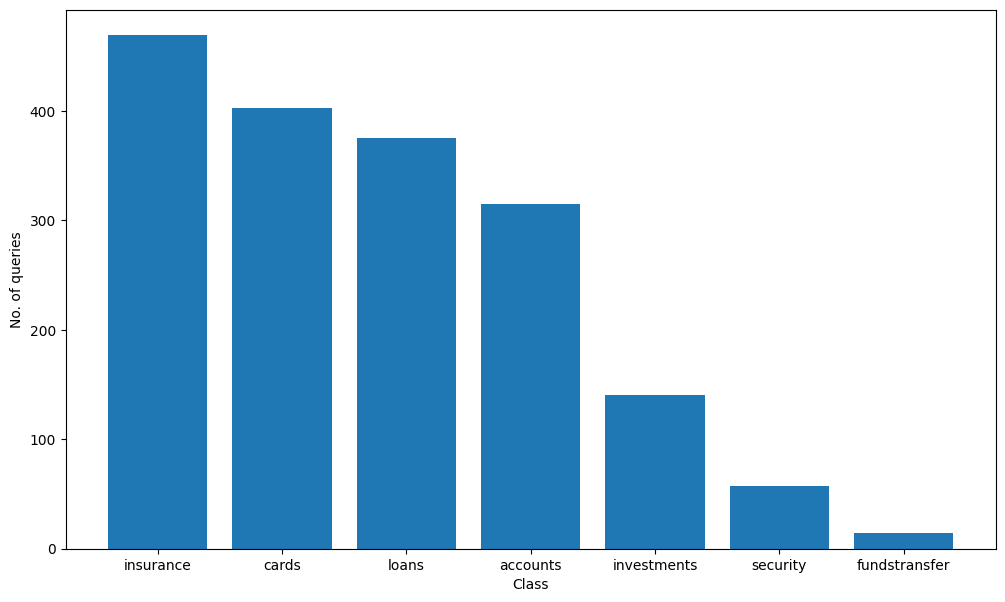

In [ ]:
plt.figure(figsize=[12,7])
plt.bar(df["Class"].value_counts().index,df["Class"].value_counts())
plt.xlabel("Class")
plt.ylabel("No. of queries")

###Exploratory Data Analysis

In [ ]:
sns.set(rc={'figure.figsize':(25,20)})

Plotting the count of questions according to length 

Text(0, 0.5, 'Count of questions')

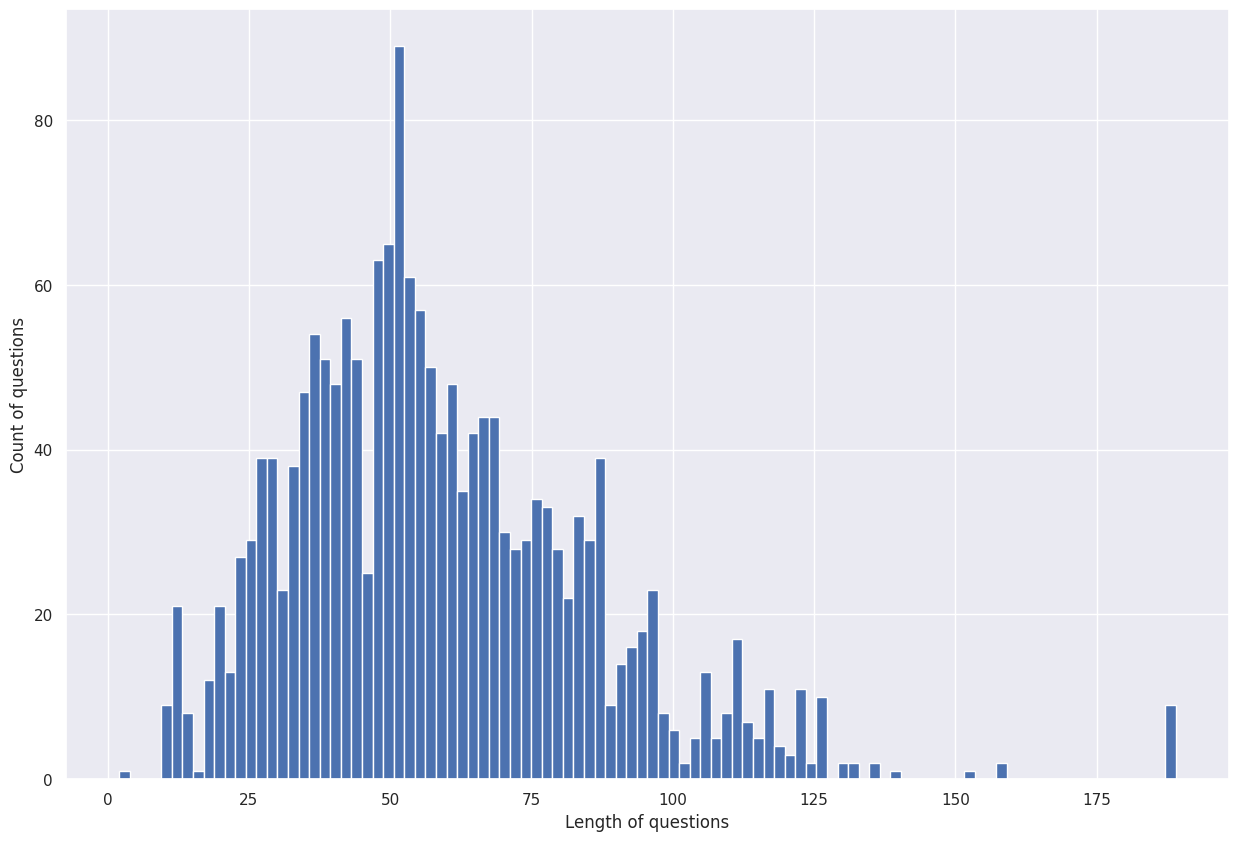

In [ ]:
plt.figure(figsize=[15,10])
plt.hist(df["Question"].str.len(),bins=100)
plt.xlabel("Length of questions")
plt.ylabel("Count of questions")

Plotting the length of answers according to length

Text(0, 0.5, 'Count of answers')

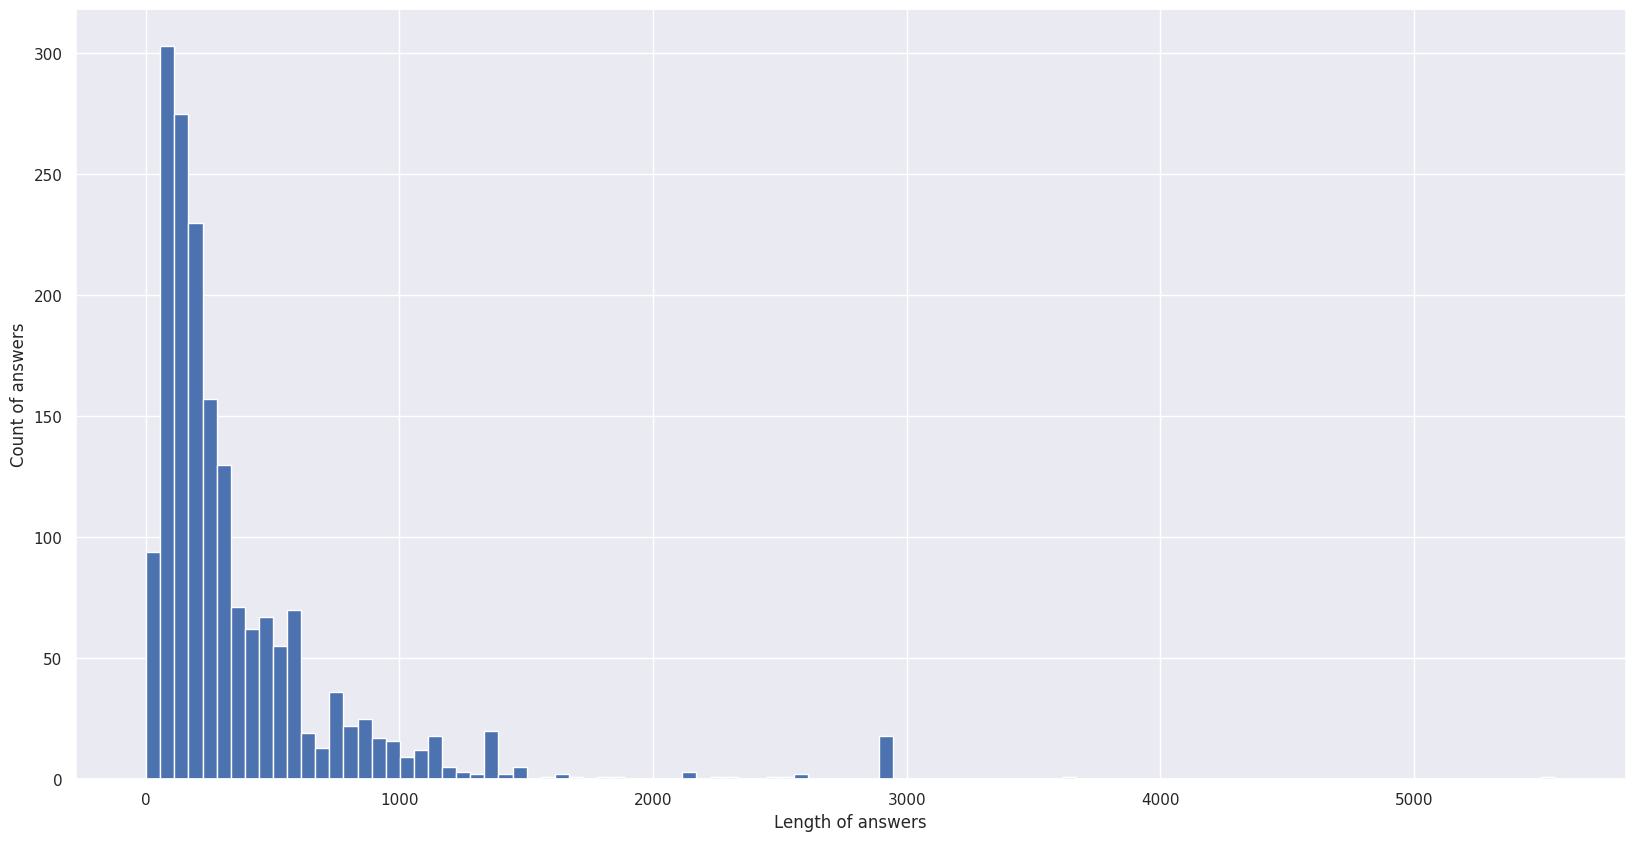

In [ ]:
plt.figure(figsize=[20,10])
plt.hist(df["Answer"].str.len(),bins=100)
plt.xlabel("Length of answers")
plt.ylabel("Count of answers")

In [ ]:
def convert_text(dept):
  class1=[]
  for text in df.loc[df["Class"]==dept,"Question"]:
    sentence=text.lower()                                            #convert to lower
    sentence =re.sub(r'[^\w\s]', '', sentence)                       #remove special characters
    words=nltk.word_tokenize(sentence)
    for word in words:
      if word not in stopwords.words("english"):
        class1.append(word)
  return class1

Accounts Department

In [ ]:
accounts=convert_text("accounts")

x,y=[],[]
for w,c in Counter(accounts).most_common()[1:11]:     #starting from 1 to exclude the word "accounts"
  x.append(w)
  y.append(c)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

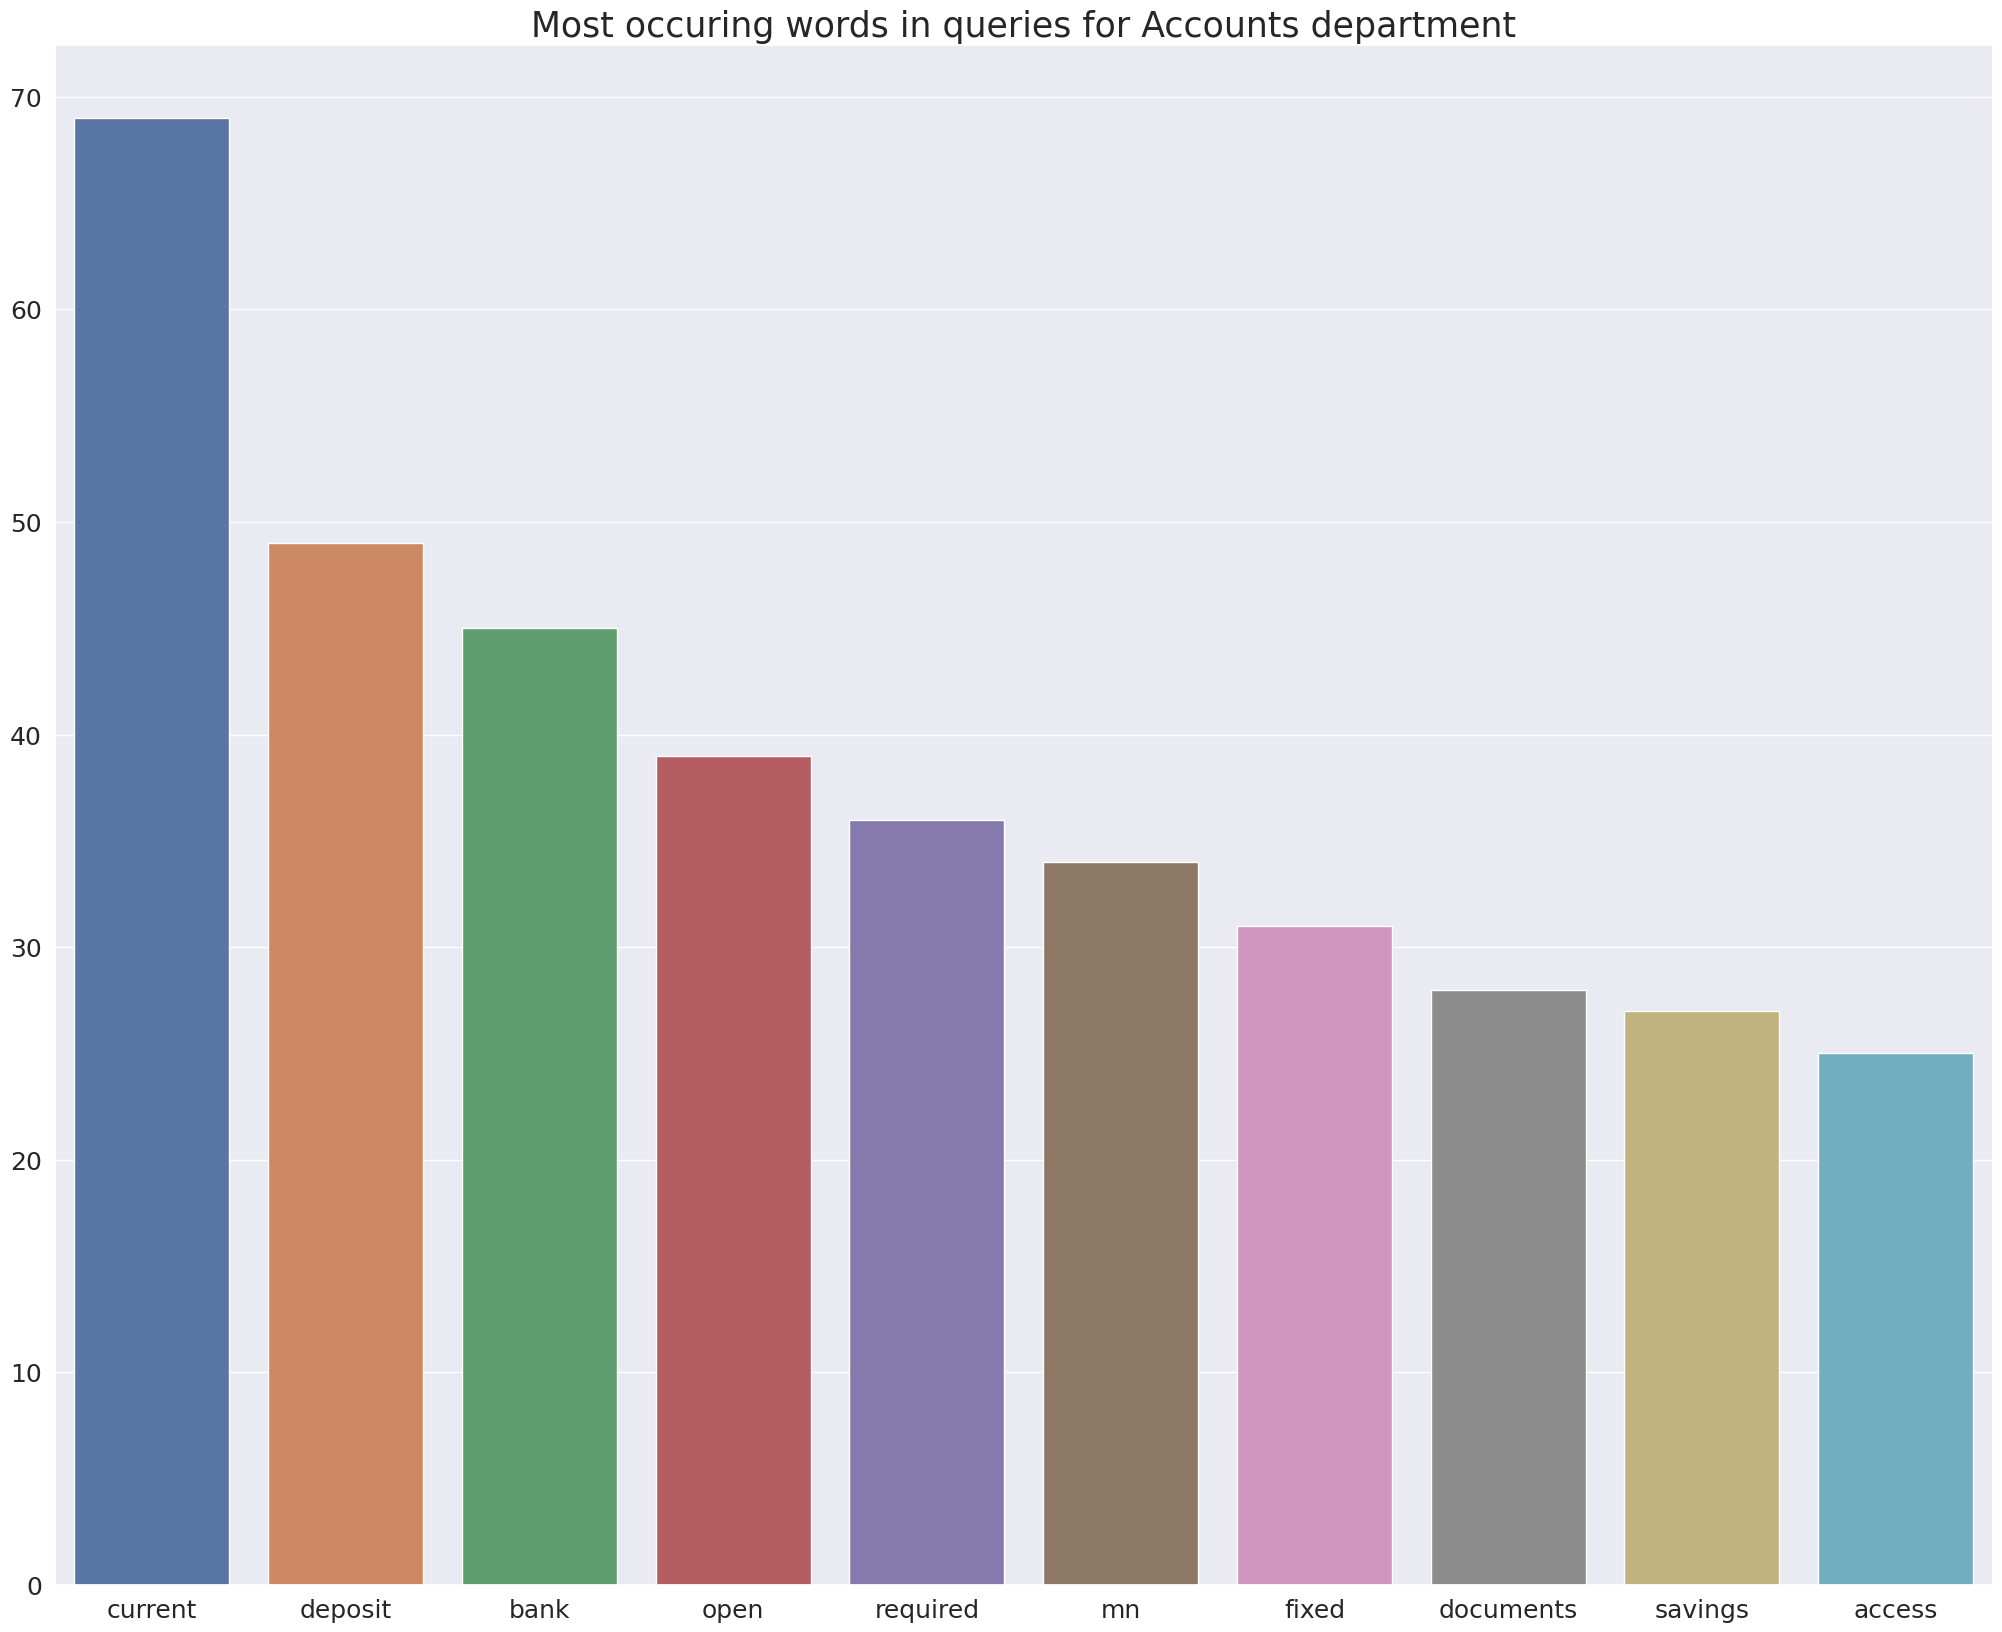

In [ ]:
sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Accounts department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Insurance Department

In [ ]:
insurance=convert_text("insurance")

x,y=[],[]
for w,c in Counter(insurance).most_common()[:10]:
  x.append(w)
  y.append(c)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

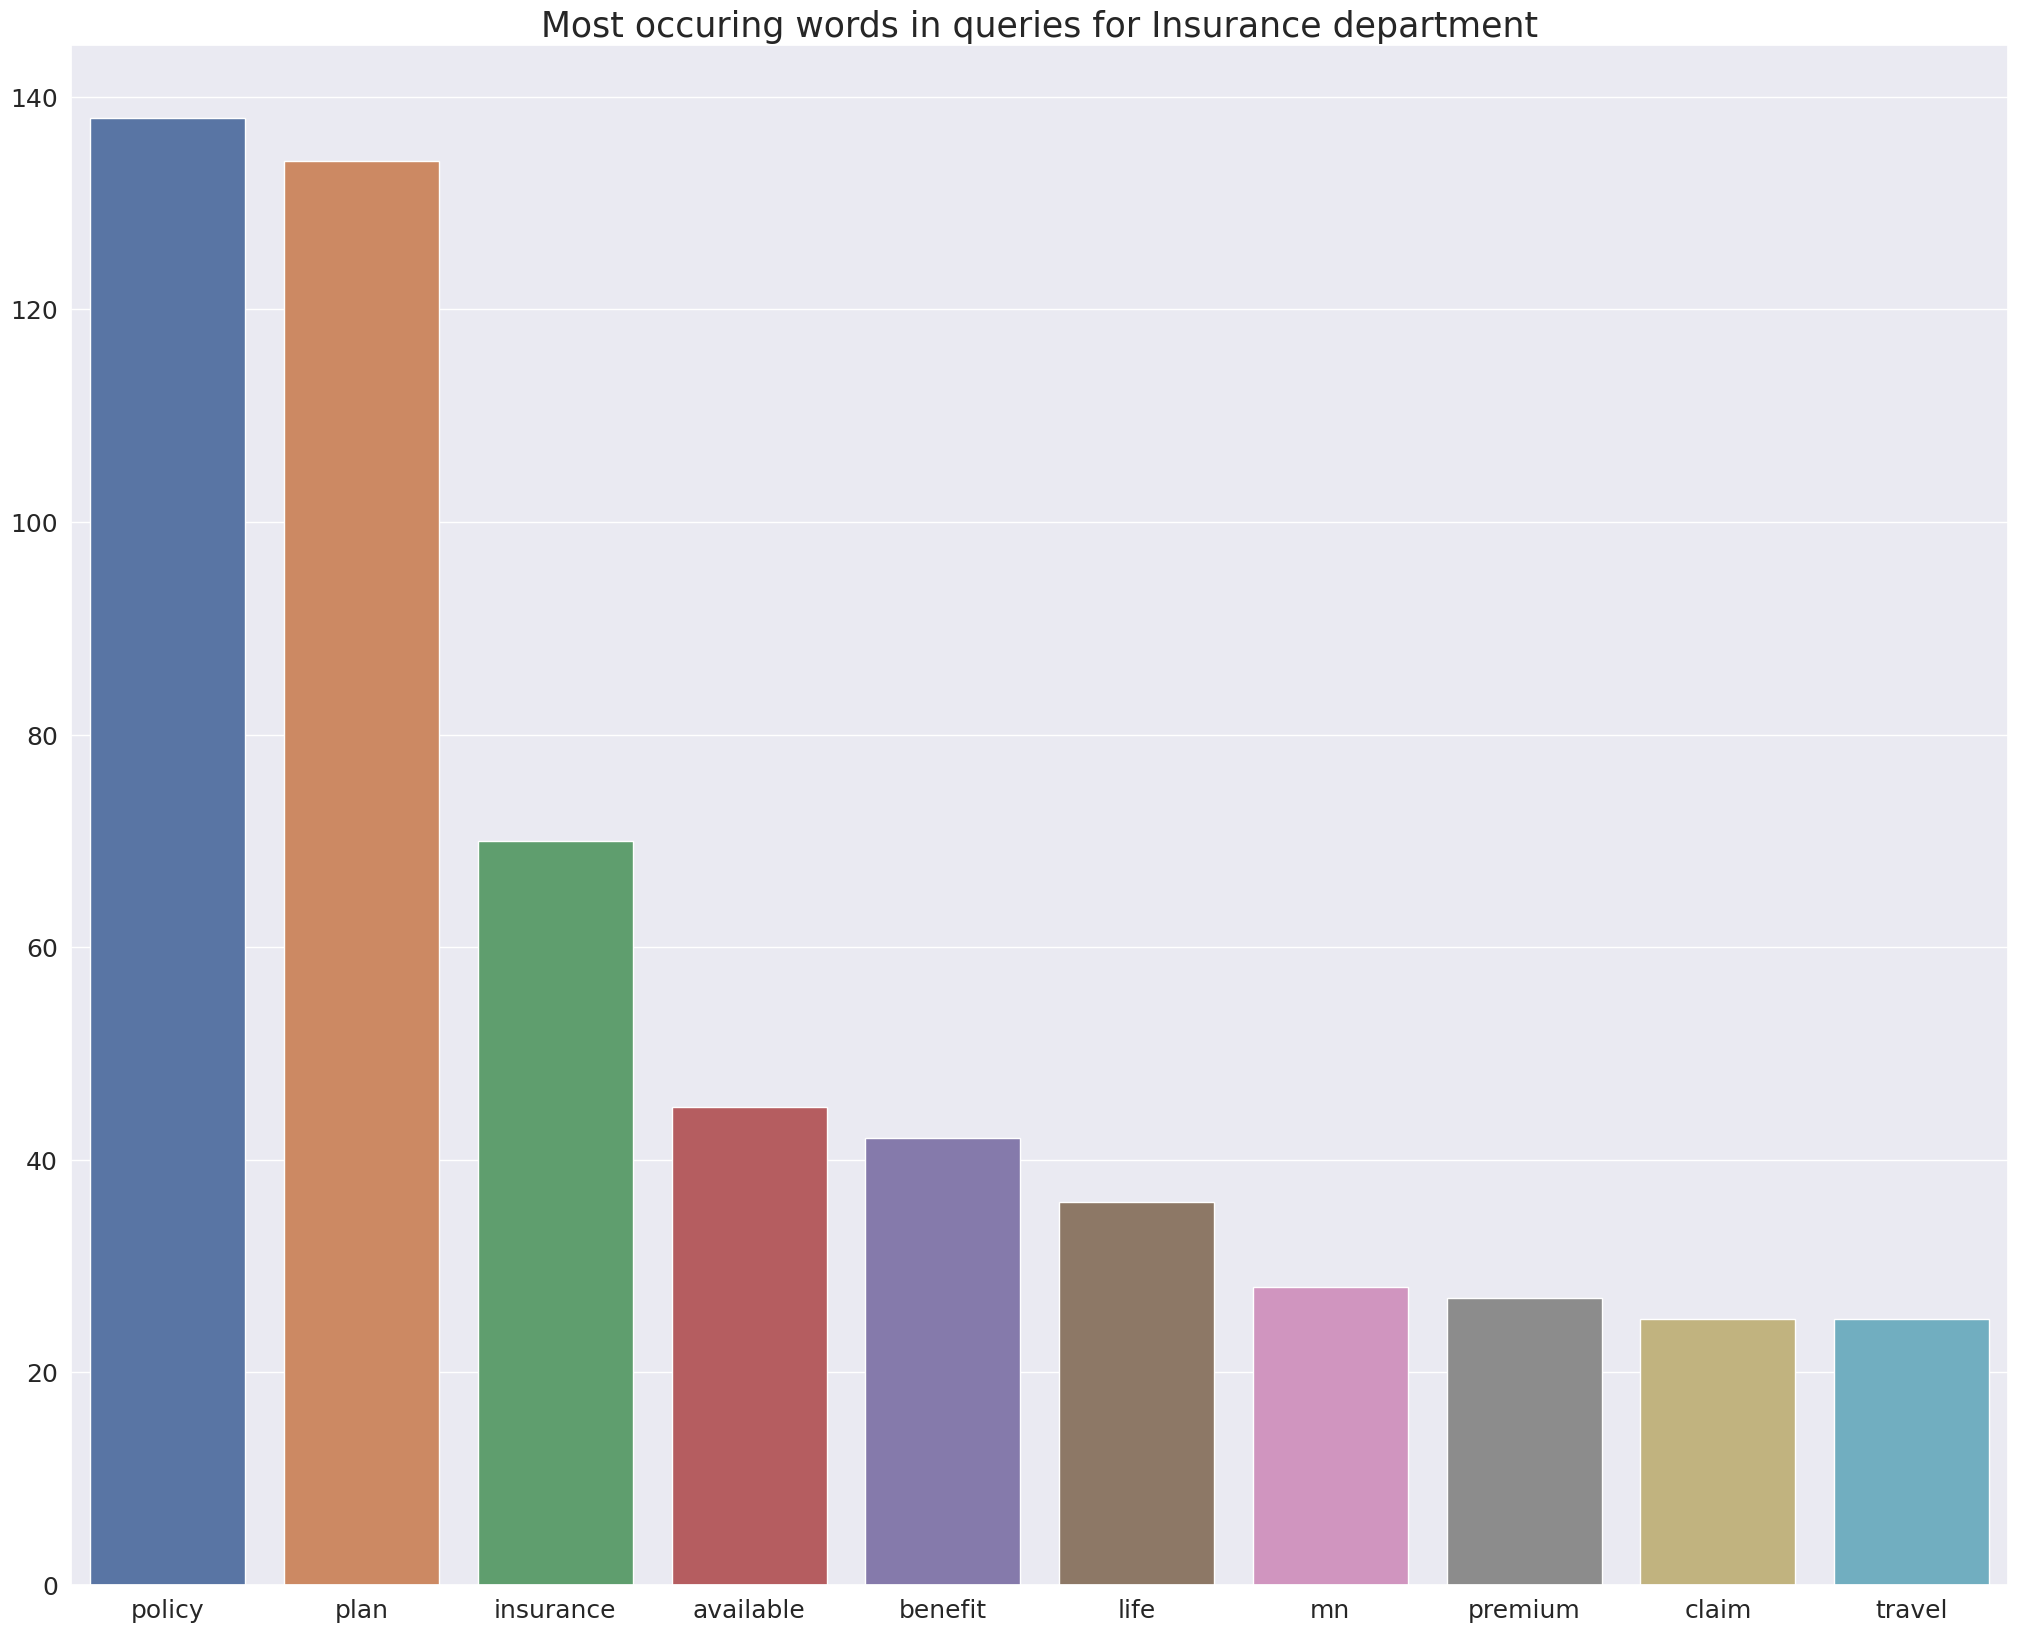

In [ ]:
sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Insurance department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Cards Department

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

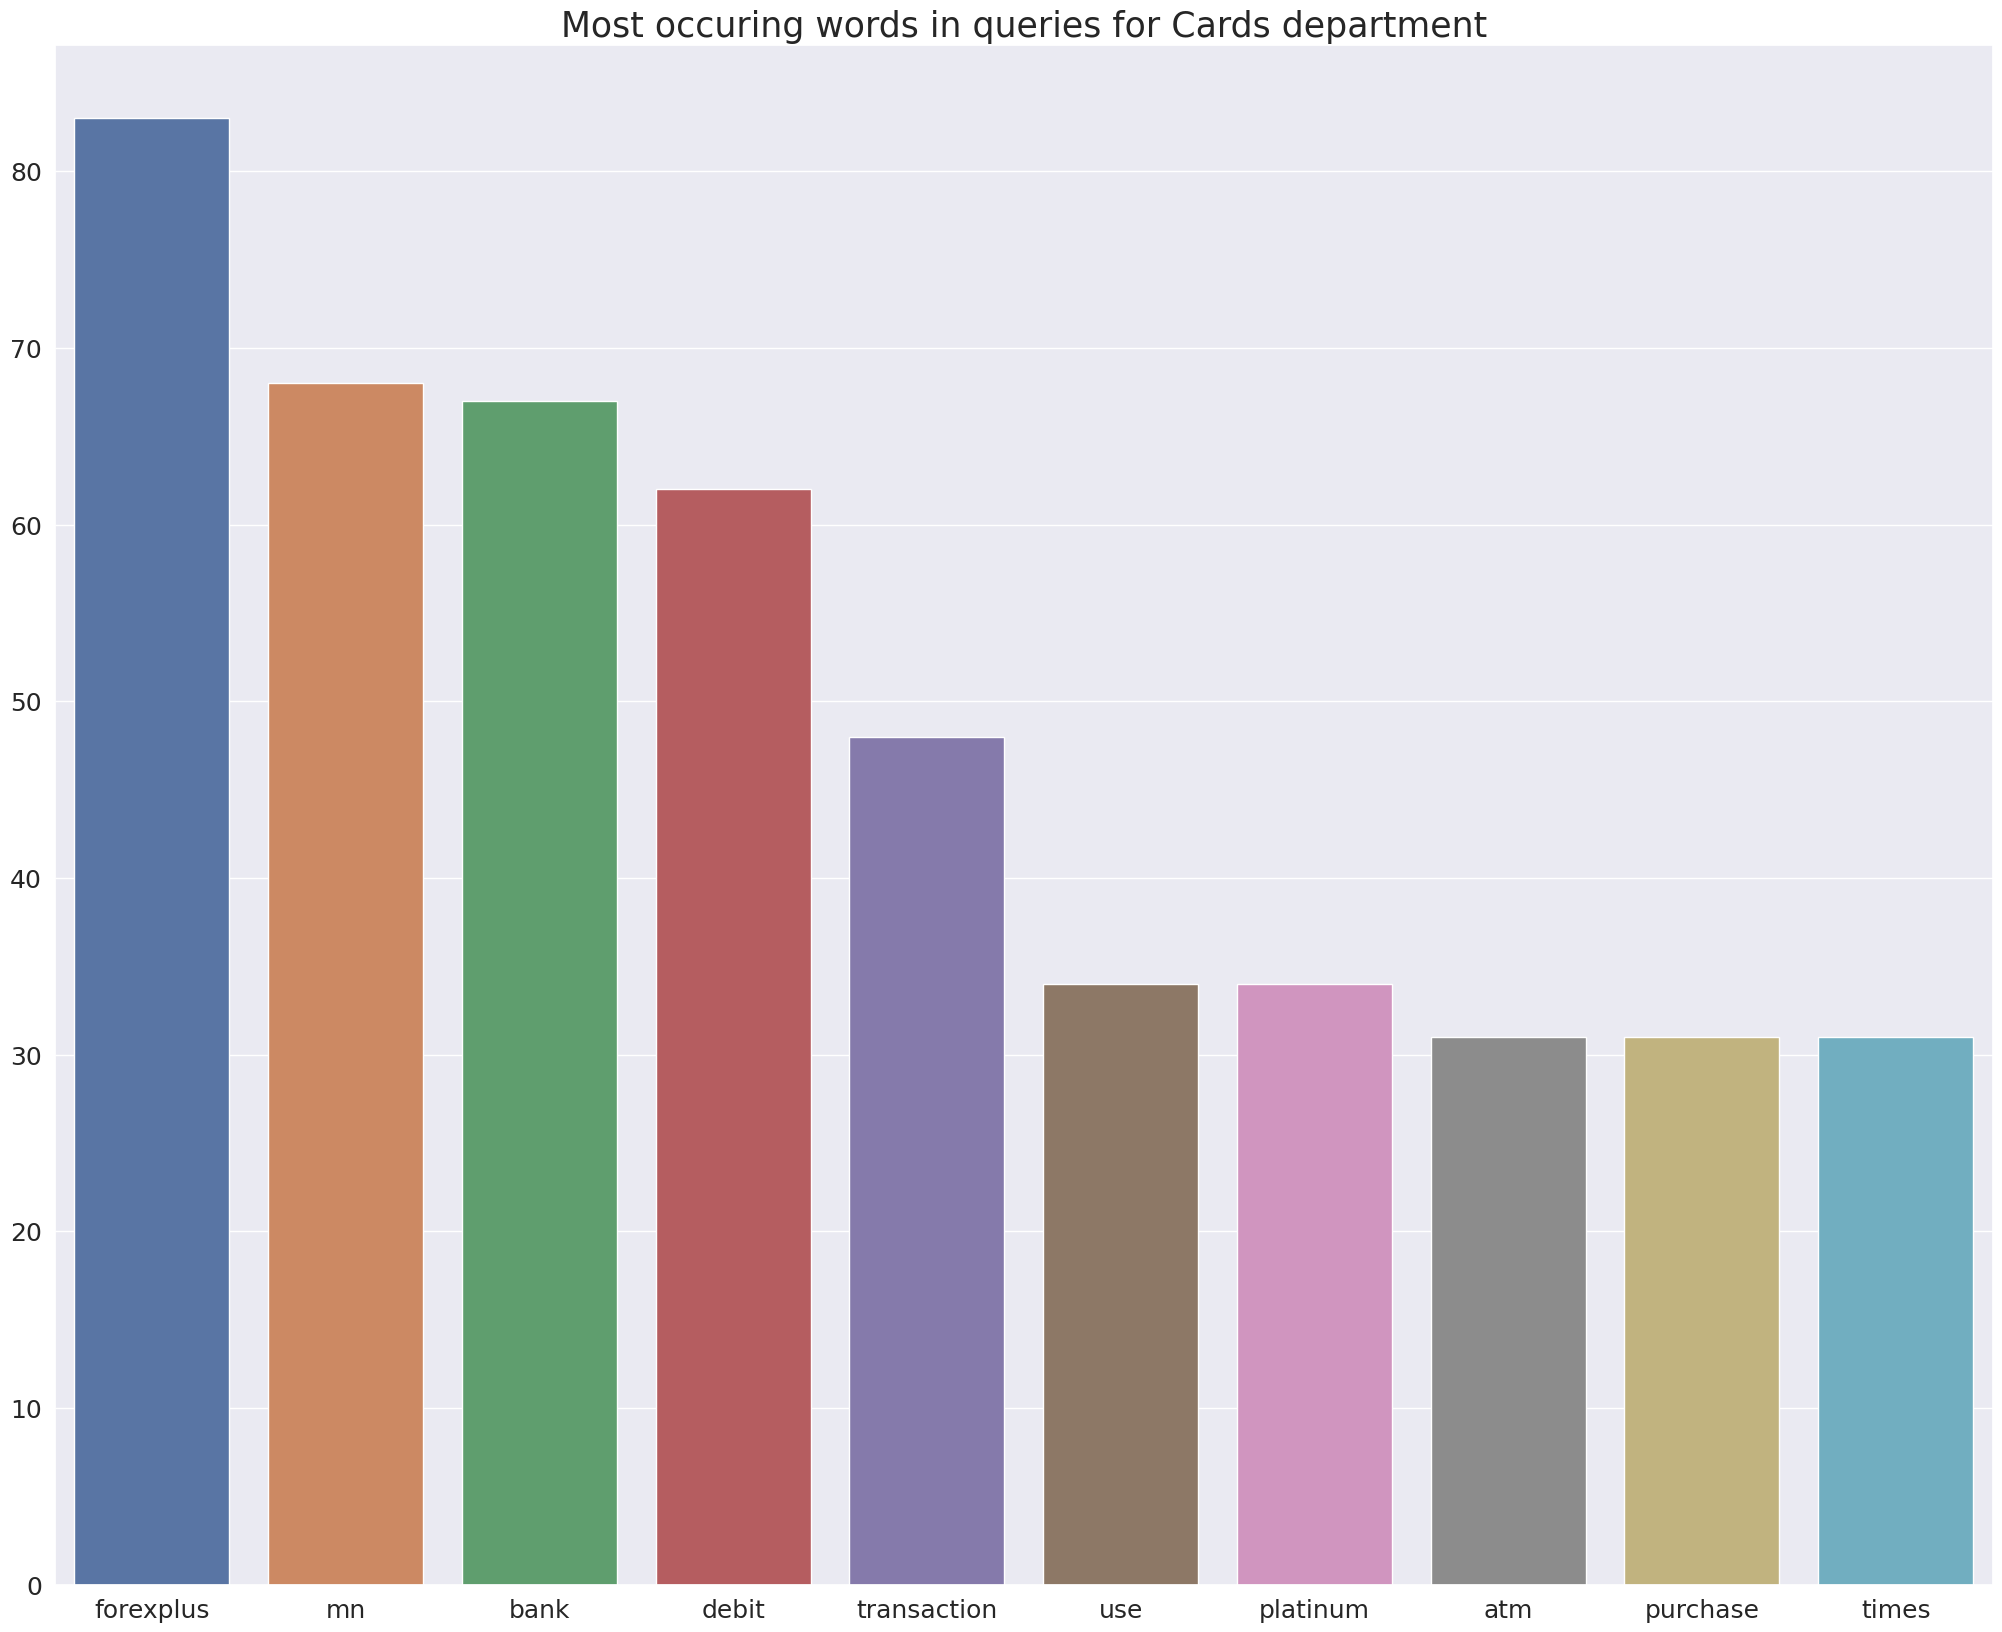

In [ ]:
cards=convert_text("cards")

x,y=[],[]
for w,c in Counter(cards).most_common()[1:11]:
  x.append(w)
  y.append(c)

sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Cards department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Loans Department

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

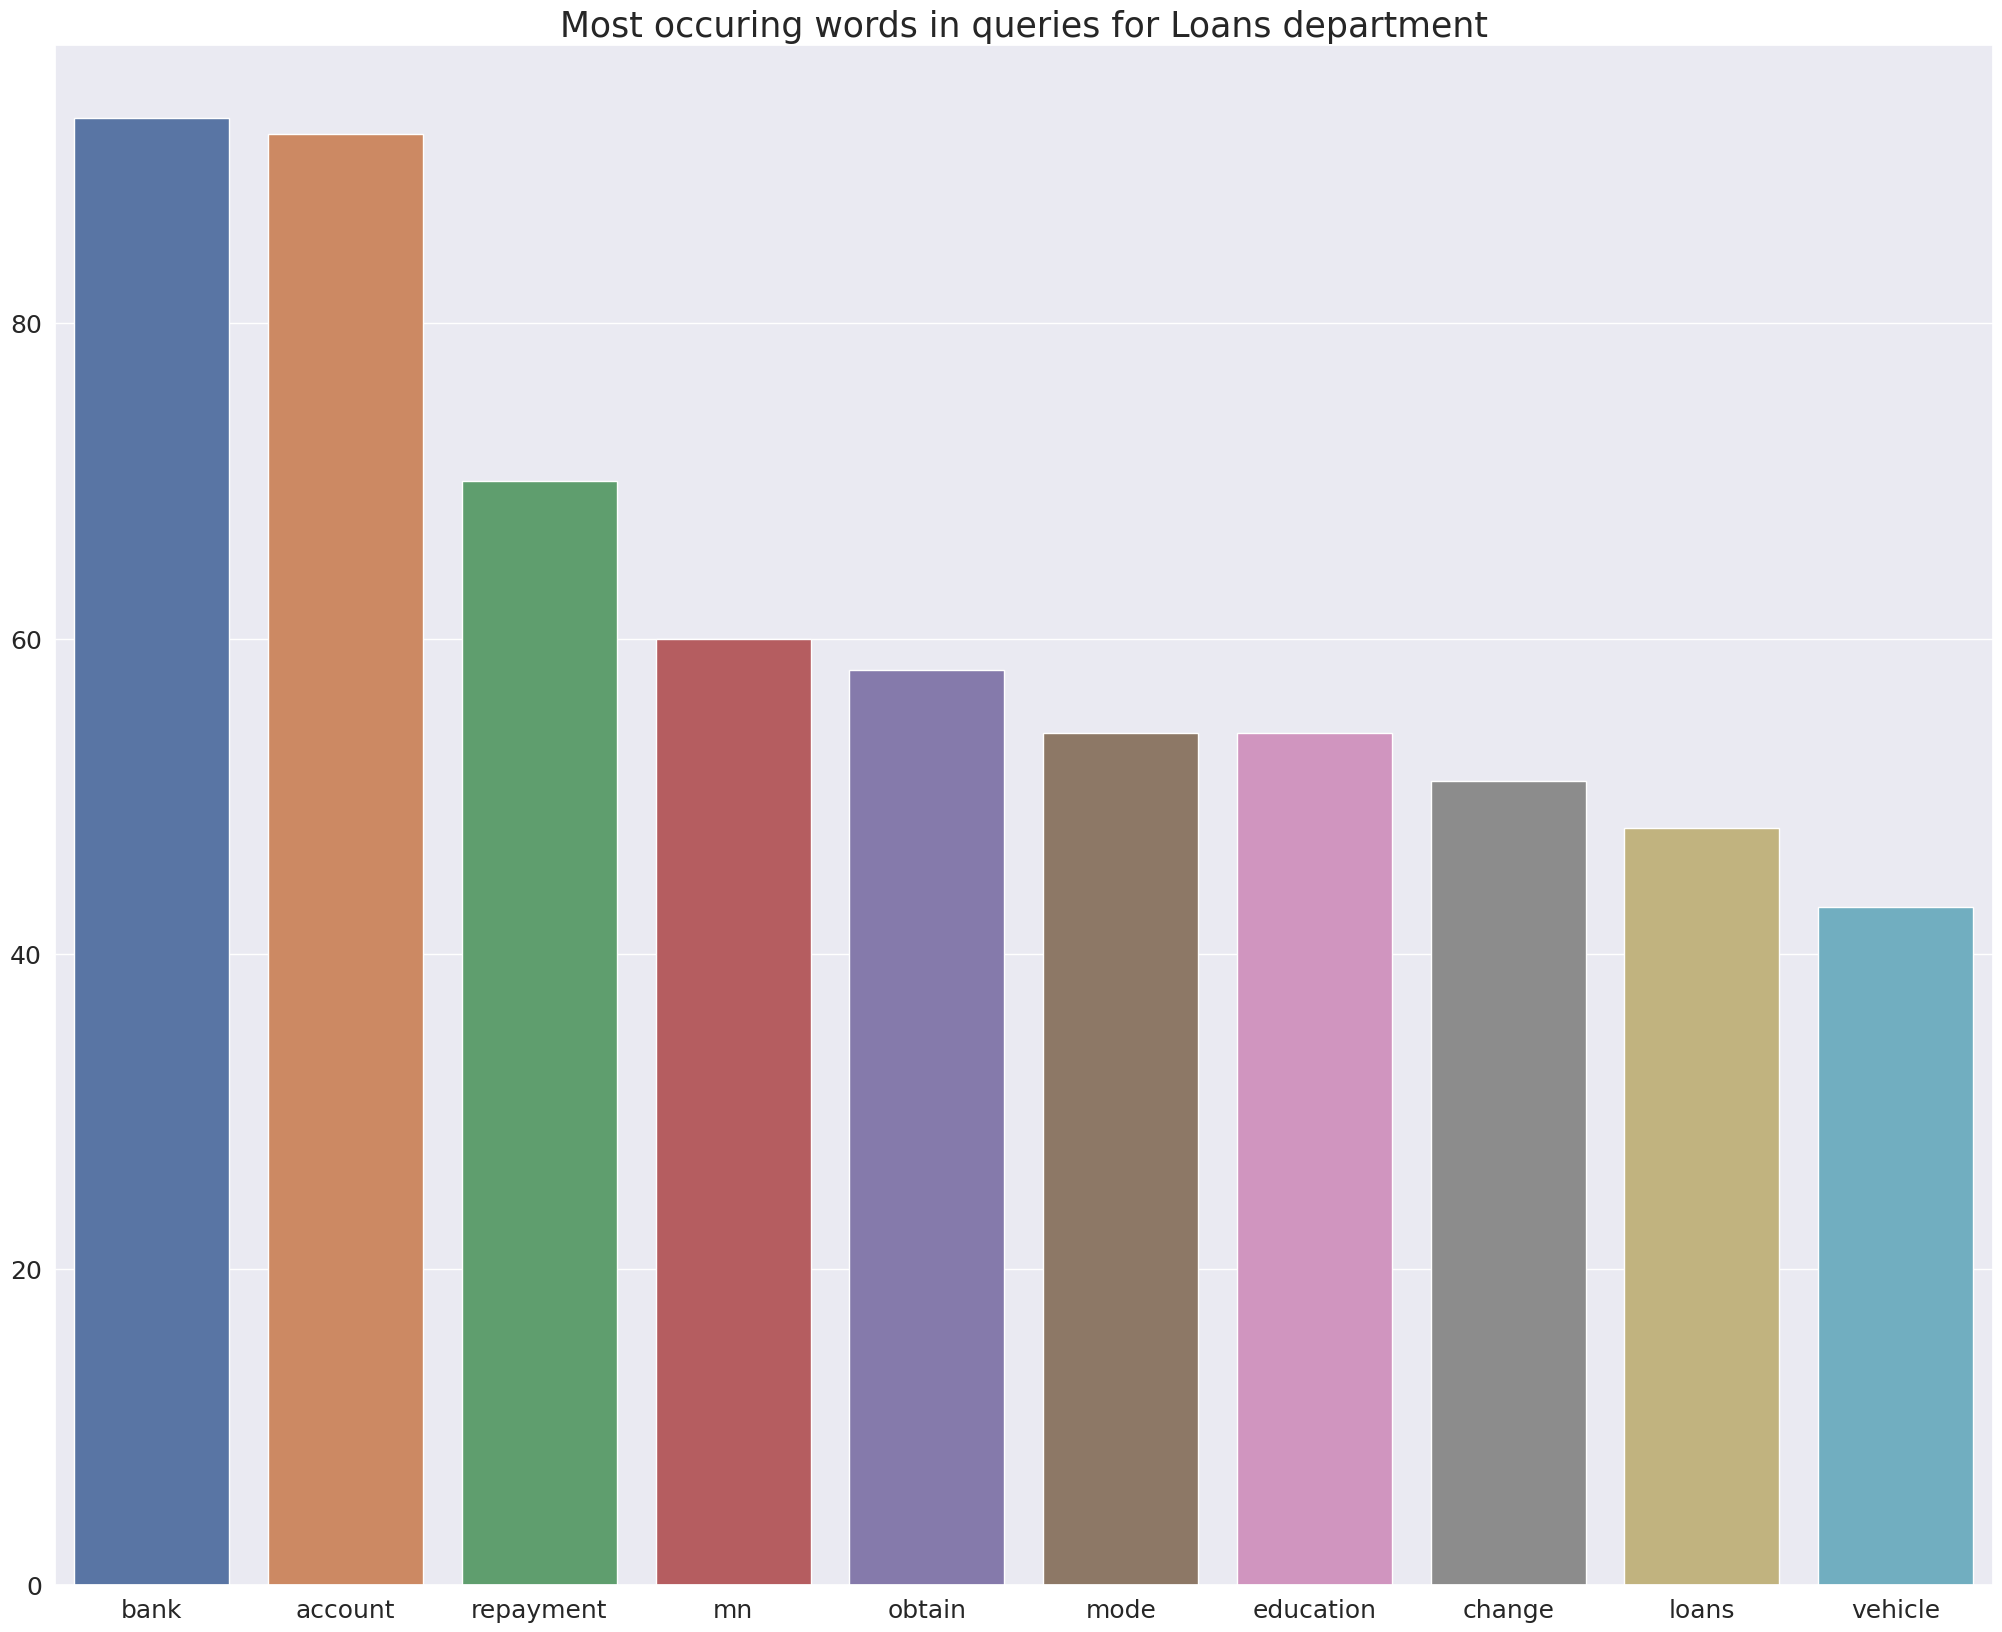

In [ ]:
loans=convert_text("loans")

x,y=[],[]
for w,c in Counter(loans).most_common()[1:11]:
  x.append(w)
  y.append(c)

sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Loans department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Investments Department

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

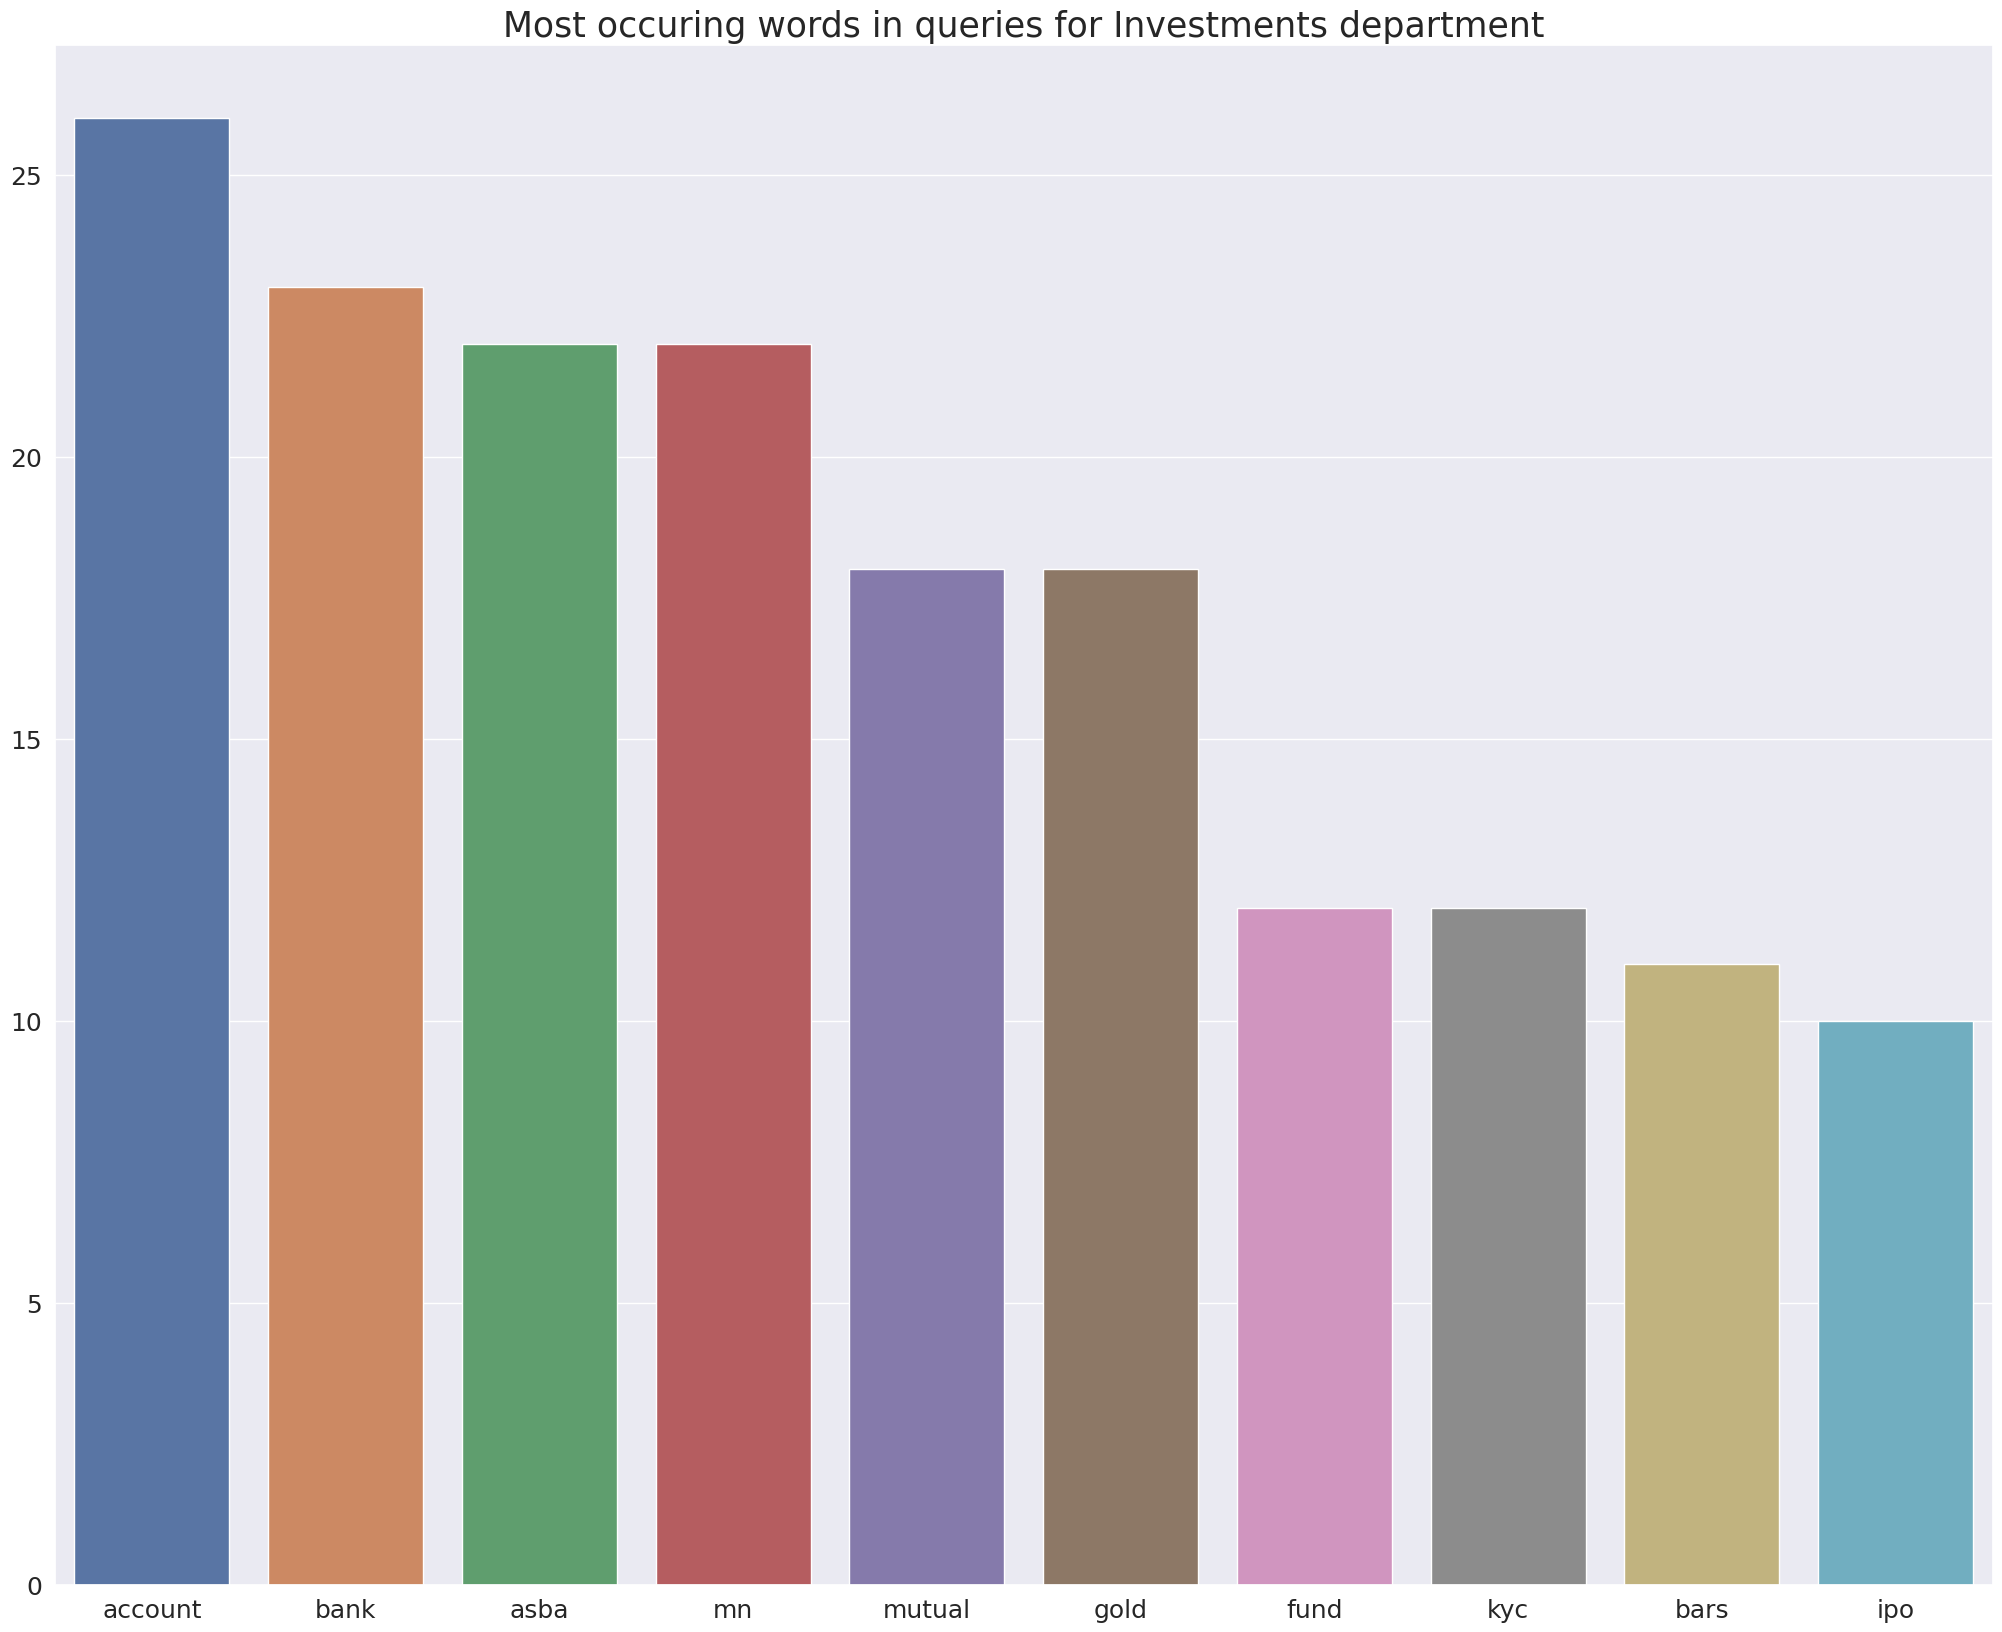

In [ ]:
investments=convert_text("investments")

x,y=[],[]
for w,c in Counter(investments).most_common()[:10]:
  x.append(w)
  y.append(c)

sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Investments department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Security Department

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

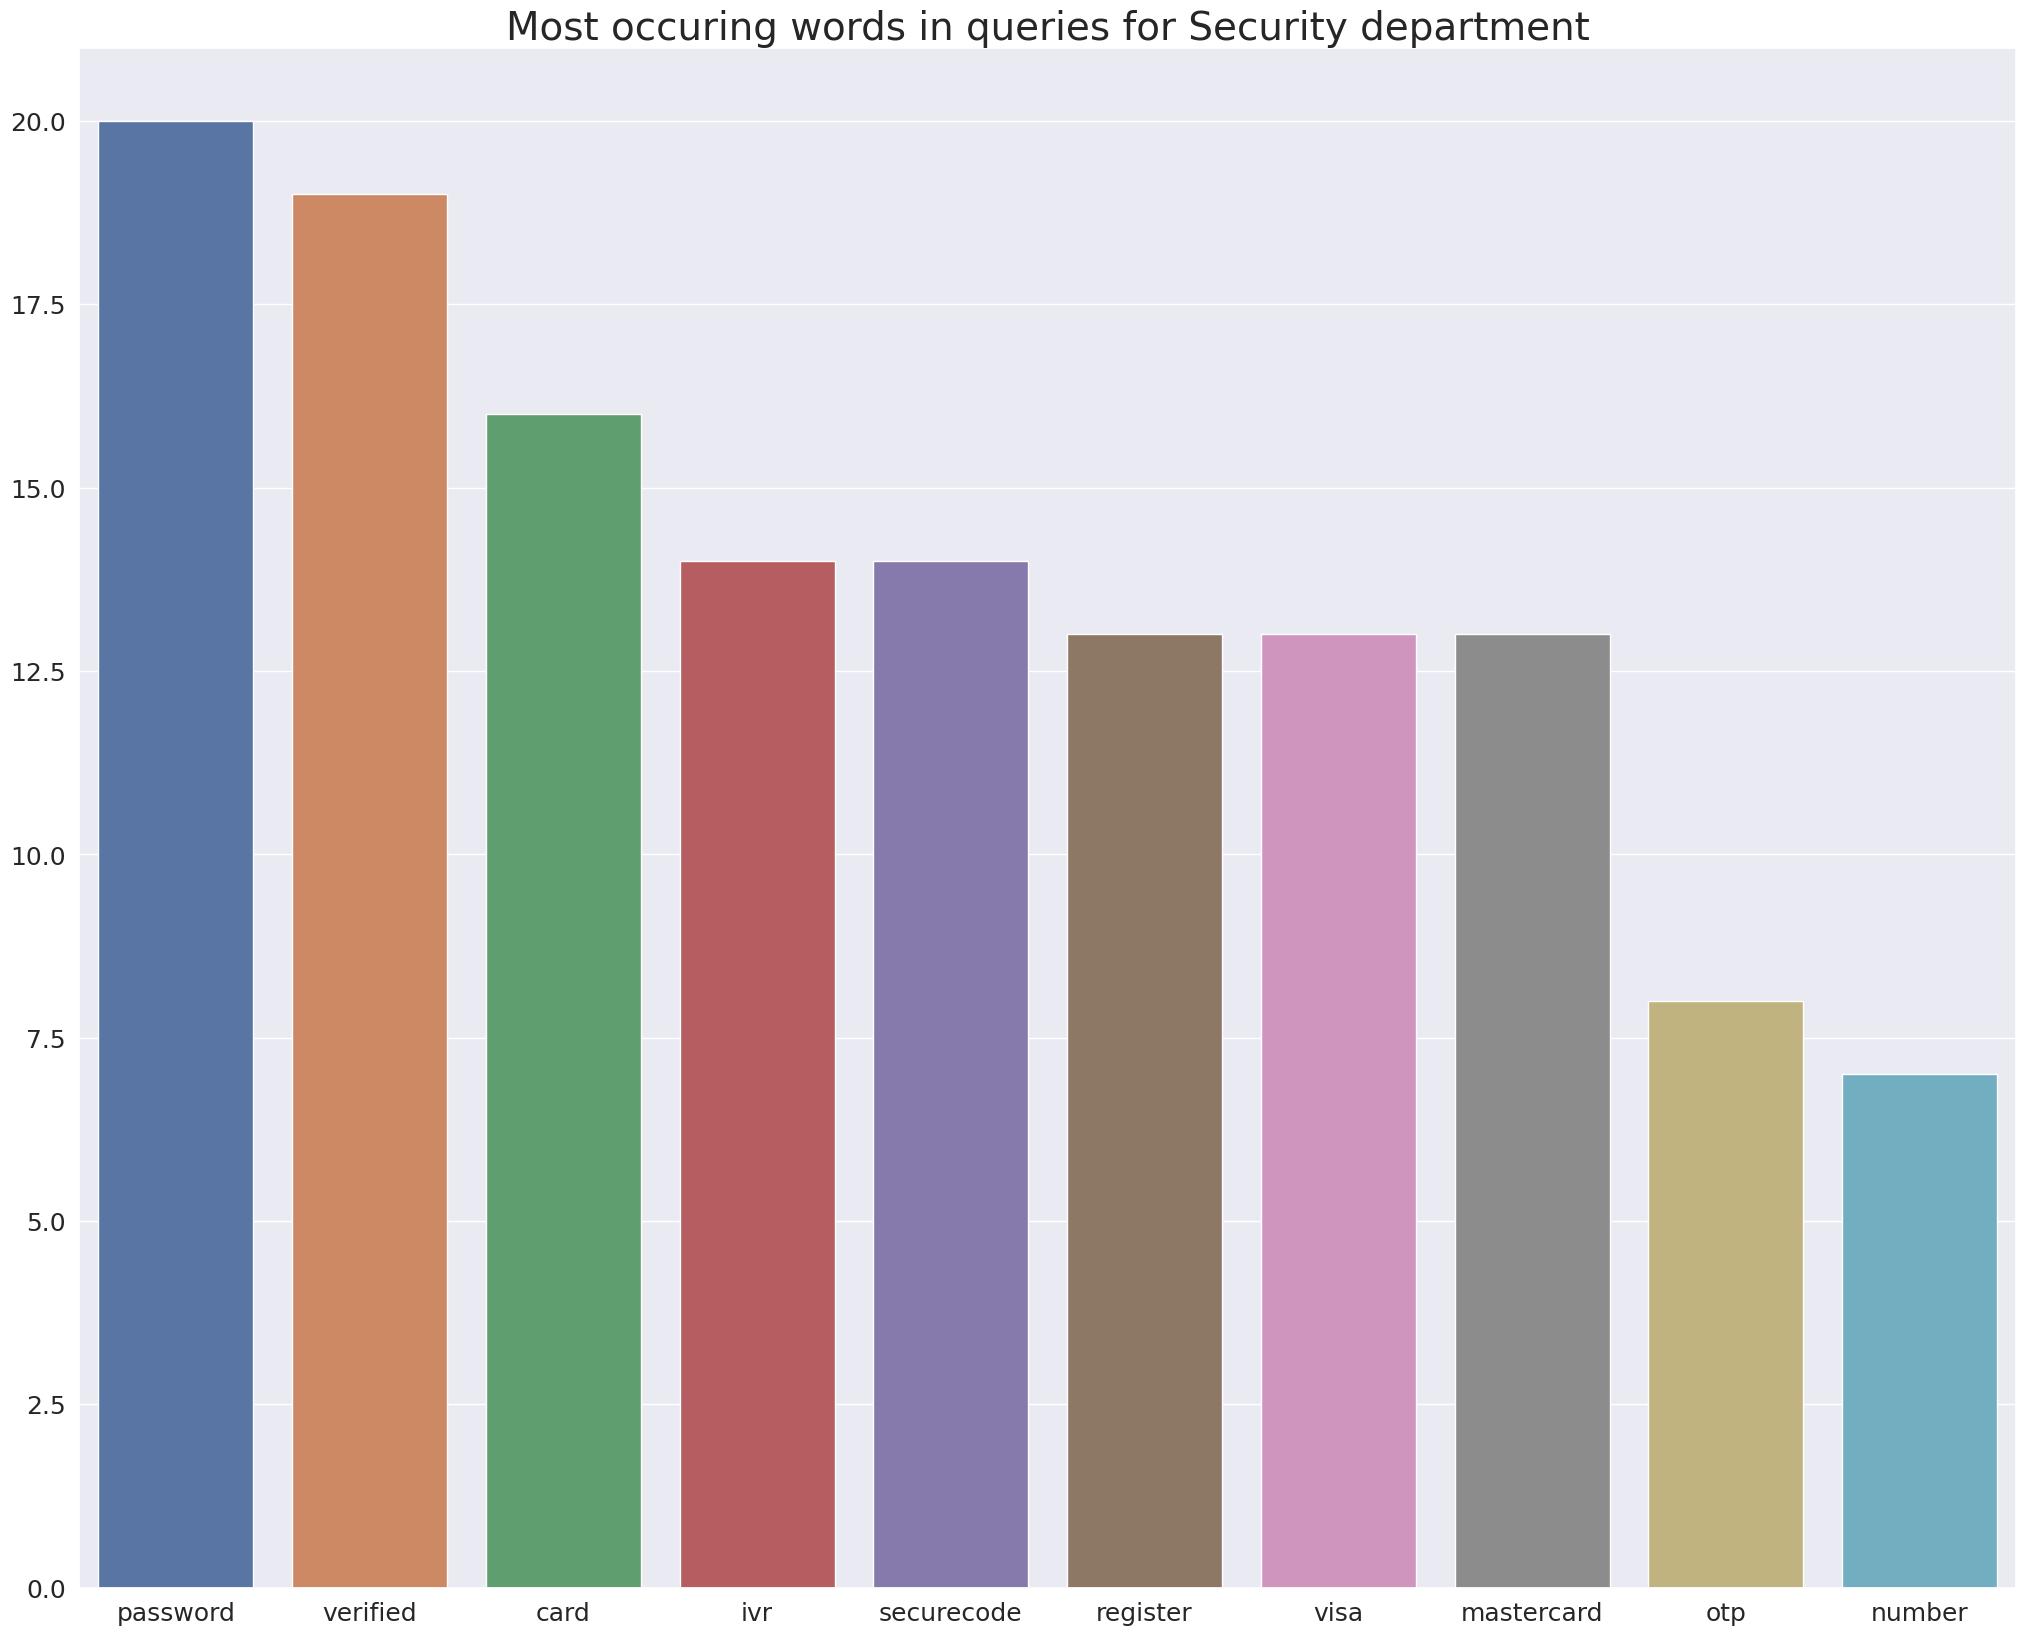

In [ ]:
security=convert_text("security")

x,y=[],[]
for w,c in Counter(security).most_common()[:10]:
  x.append(w)
  y.append(c)

sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Security department",fontdict={'size': 28})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Fundstransfer Department

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8')])

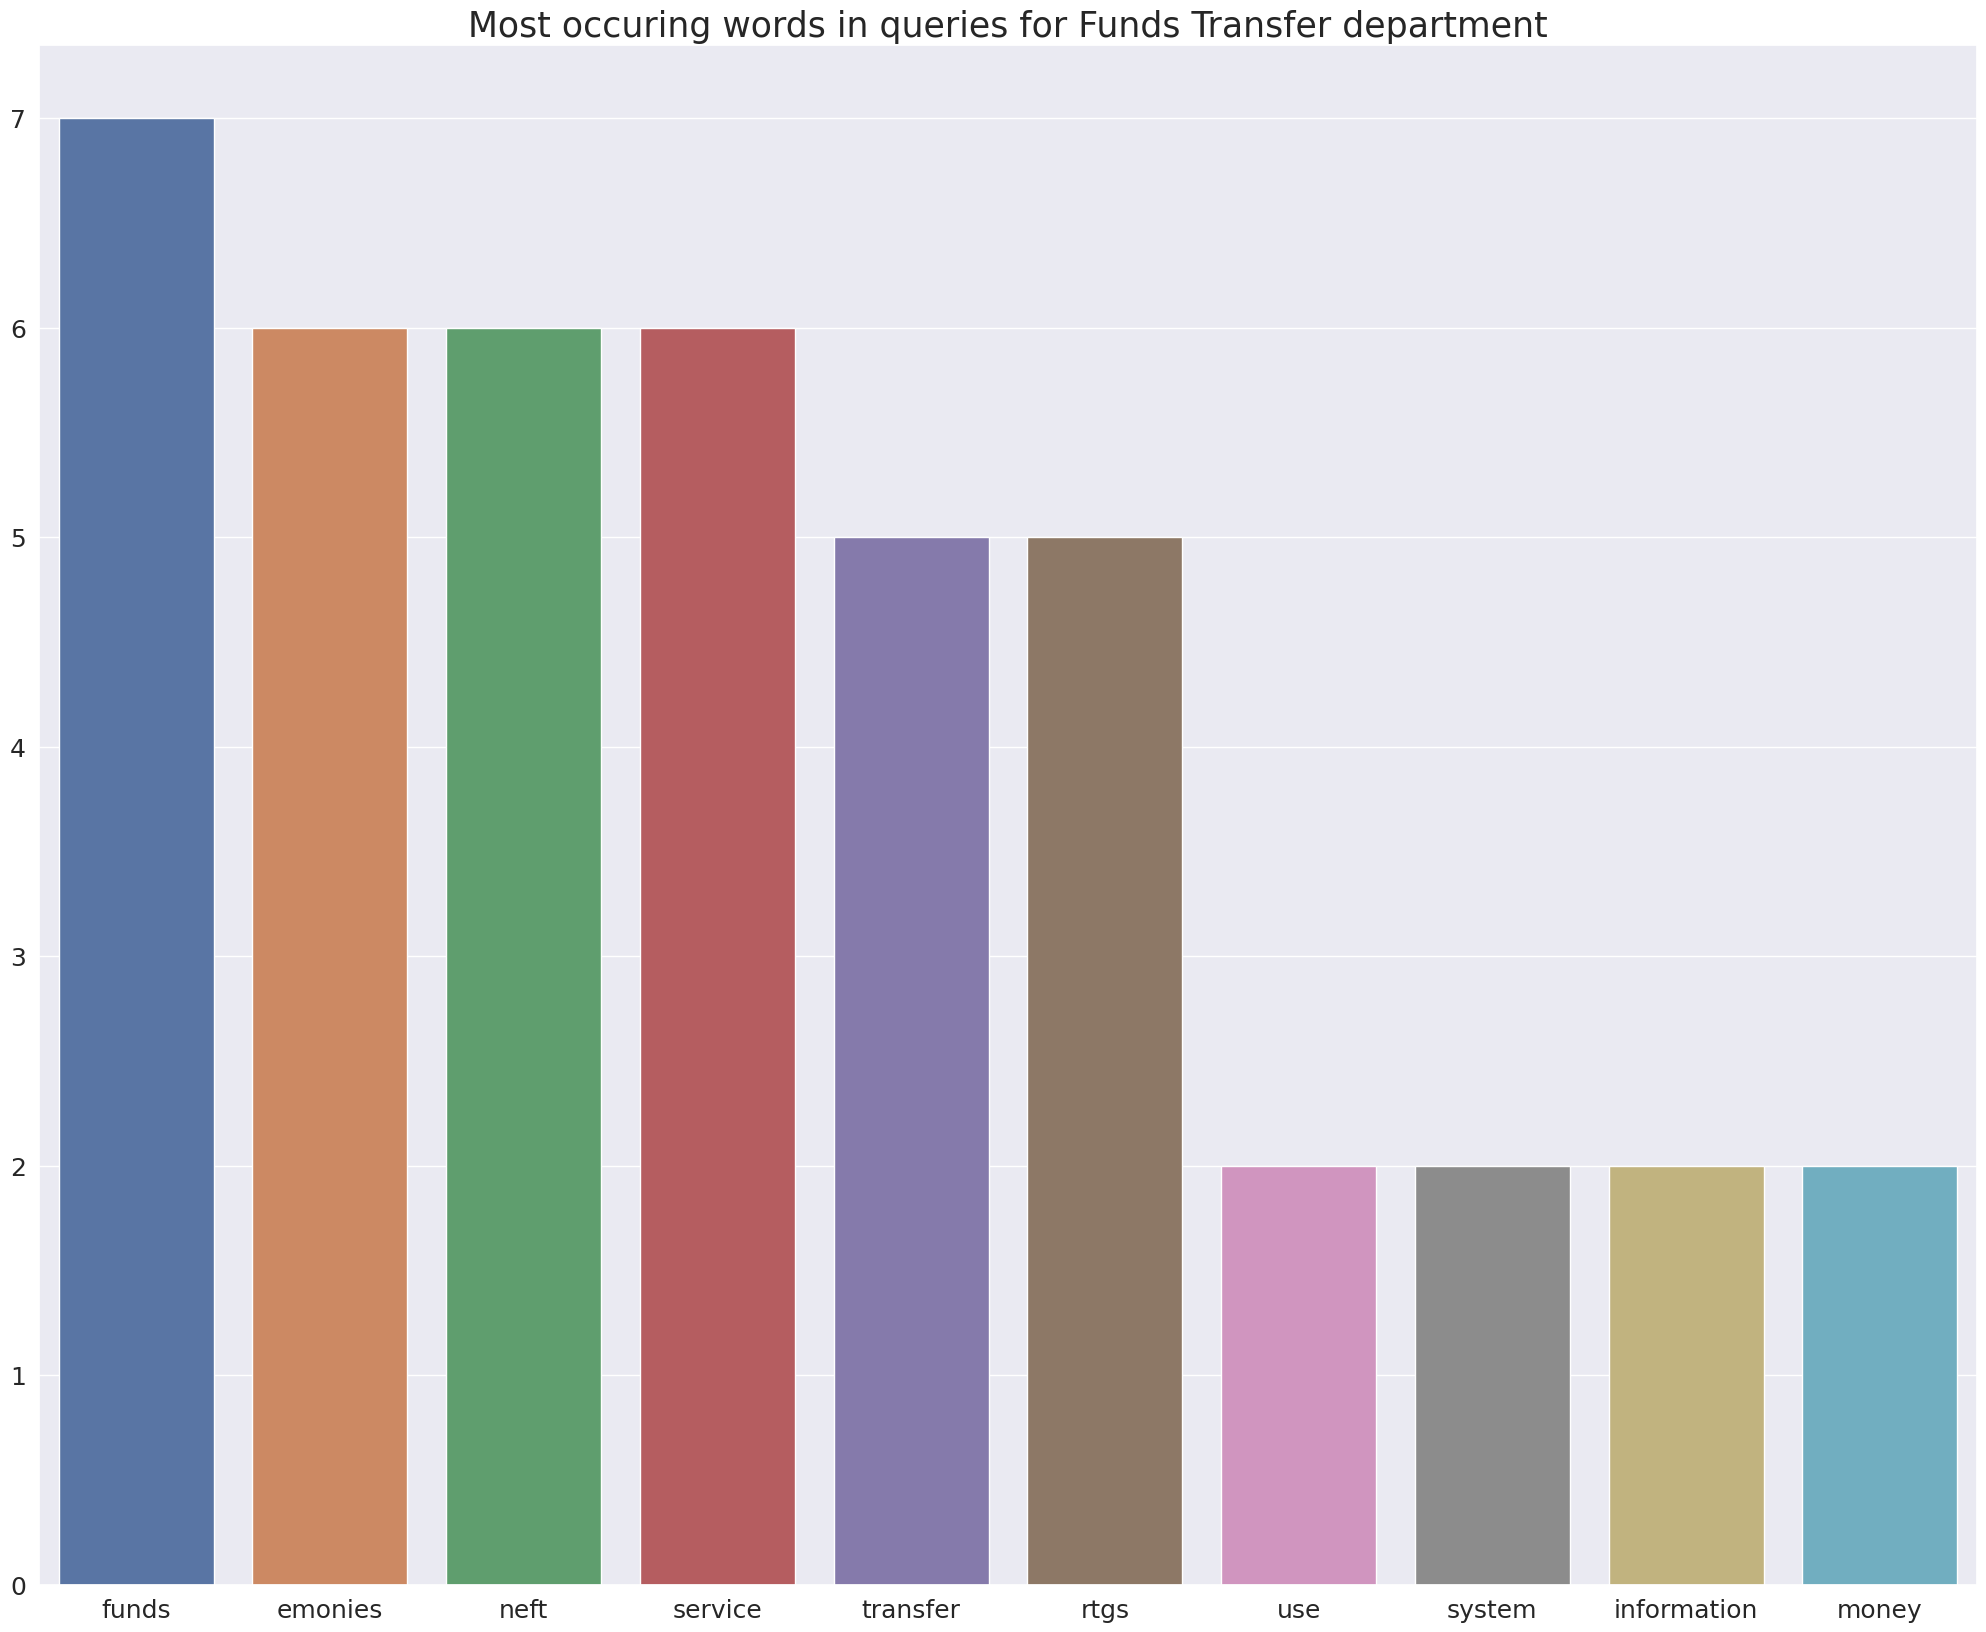

In [ ]:
funds=convert_text("fundstransfer")

x,y=[],[]
for w,c in Counter(funds).most_common()[:10]:
  x.append(w)
  y.append(c)

sns.barplot(x=x,y=y)
plt.title("Most occuring words in queries for Funds Transfer department",fontdict={'size': 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

###Feature Engineering

In [ ]:
stemmer=PorterStemmer()

In [ ]:
def preprocess_text(text):
  sentence=text.lower()                            #converting to lower case
  sentence =re.sub(r'[^\w\s]', '', sentence)              #removing punctuations,links,special characters
  sentence = re.sub(r"https\S+|www\S+https\S+", '',sentence, flags=re.MULTILINE)
  sentence = re.sub(r'\@w+|\#','',sentence)
  words=word_tokenize(sentence)                              #tokenization
  words=[stemmer.stem(word) for word in words if word not in stopwords.words("english")]           #removing stop-words and stemming
  return " ".join(words)

In [ ]:
df["Question_1"]=df["Question"].astype(str).apply(preprocess_text)
df["Answer_1"]=df["Answer"].astype(str).apply(preprocess_text)

Label Encoding for "Class"

In [ ]:
le=LabelEncoder()
le.fit(df["Class"].value_counts().index)
df["Class"]=le.transform(df["Class"])

###Predictive Models

Finding Similarity between question asked and the answers available

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(df["Question_1"].values.tolist())

question_vectors=vectorizer.transform(df["Question_1"]).toarray()

In [ ]:
user="Not able to access company current account"
test_vector=vectorizer.transform([preprocess_text(user)]).toarray()

cosine_sim=cosine_similarity(question_vectors,test_vector)
most_sim_idx=np.argmax(cosine_sim)

print(f"Answer: {df.iloc[most_sim_idx]['Answer']}")

Answer: If you are unable to access your company Current Account, it may be because you have entered an incorrect Customer Identification Number (Cust ID) to log into your NetBanking Account. While opening Accounts of Companies, separate Customer IDs are created in the name of the Company as well as each of the Authorized Signatory(ies). The Authorised Signatory(ies) is distinct and has to be used to access NetBanking for the Company Account. For more details, Contact Us


###Pickling

In [ ]:
import pickle

In [ ]:
pickle.dump(df[["Question","Answer","Question_1","Answer_1"]], open('BANK_data.pkl', 'wb'))

In [ ]:
pickle.dump(vectorizer,open('Vectorizer.pkl','wb'))
pickle.dump(question_vectors,open('Question_vectors.pkl','wb'))

###Unpickling

In [ ]:
df_p=pickle.load(open('/content/BANK_data.pkl','rb'))

In [ ]:
vec_p=pickle.load(open('/content/Vectorizer.pkl','rb'))
question_p=pickle.load(open('/content/Question_vectors.pkl','rb'))

In [ ]:
user="Finding CVV2"
test_vector=vec_p.transform([preprocess_text(user)]).toarray()

cosine_sim=cosine_similarity(question_p,test_vector)
most_sim_idx=np.argmax(cosine_sim)

print(f"Answer: {df_p.iloc[most_sim_idx]['Answer']}")

Answer: CVV2 is three digit number mentioned at reverse of your card.


###Considering Class as Dependent Variable

Creating Vectors

In [ ]:
X=df["Question_1"]
y=df["Class"].values

In [ ]:
vectorizer1=TfidfVectorizer()
X=vectorizer1.fit_transform(df["Question_1"].values)

Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=67)

In [ ]:
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)
print(f"Training accuracy:{accuracy_score(y_train,svc.predict(X_train))}")
print(f"Testing accuracy:{accuracy_score(y_test,svc.predict(X_test))}")

Training accuracy:0.9915373765867419
Testing accuracy:0.9098591549295775


In [ ]:
questions=["Interest rates for Senior Citizens",
"Education loan rates and tenure",
"Details for foreign exchange transactions",
"Applying for new debit cards",
"Mutual funds available with highest returns",
"Payment of pensions to Government pensioners",
"Update contact details for a savings account",
"Use of existing salary account for new employer", 
"Insurance policies available with the bank",
"Deactivate contactless payment mode for debit card"]


answers=[]
for user in questions:
  test_vector=vectorizer.transform([preprocess_text(user)]).toarray()

  cosine_sim=cosine_similarity(question_vectors,test_vector)
  most_sim_idx=np.argmax(cosine_sim)
  answers.append(df.iloc[most_sim_idx]['Answer'])

In [ ]:
test=pd.DataFrame(columns=["Questions","Answers"])
test["Questions"]=questions
test["Answers"]=answers
test

,Questions,Answers
0,Interest rates for Senior Citizens,We offer preferential rate of interest on Fixe...
1,Education loan rates and tenure,The maximum repayment tenures are as below: Fo...
2,Details for foreign exchange transactions,You can load the currencies as per the limits ...
3,Applying for new debit cards,"Yes, you can register with any of your M&N Ba..."
4,Mutual funds available with highest returns,Once you are registered for an Investment Serv...
5,Payment of pensions to Government pensioners,You can open pension account 6 months prior to...
6,Update contact details for a savings account,Customer's can now update PAN details through ...
7,Use of existing salary account for new employer,"Yes, In case an arrangement exists, we request..."
8,Insurance policies available with the bank,"You can insure yourself for Rs. 3 Lakhs, Rs. 4..."
9,Deactivate contactless payment mode for debit ...,1. Look for MasterCard PayPass mark and contac...
